In [1]:
import skewtfit as sf
from CentralStreamingModel.utils.plot_tools import bestfit_jointplot
import CentralStreamingModel.biskewt.skewt as st
import matplotlib.pyplot as plt
import numpy as np
from CentralStreamingModel.utils.read_probabilities import VD
from scipy.special import gamma


In [2]:
def mean(epsilon, w, alpha, dof):
    b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
    delta = alpha / np.sqrt(1+alpha**2)
    return epsilon + w*delta*b_dof

def std(w, alpha, dof):
    b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
    delta = alpha / np.sqrt(1+alpha**2)
    return np.sqrt(w**2  *(dof/(dof-2) - delta**2 * b_dof**2))

def gamma1(alpha, dof):
    b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
    delta = alpha / np.sqrt(1+alpha**2)
    
    return delta*b_dof * ((dof * (3 - delta**2))/(dof-3) - 3*dof/(dof-2.)\
                + 2*delta**2*b_dof**2) * (dof/(dof-2) - delta**2 * b_dof**2)**(-1.5)

def gamma2(alpha, dof):
    b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
    delta = alpha / np.sqrt(1+alpha**2)
    
    value =  ( 3 * dof**2 / ((dof-2) * (dof-4)) - \
            4 * delta**2*b_dof**2 *dof*(3-delta**2)/(dof-3)\
            + 6 * delta**2 *b_dof**2*dof/(dof-2) -\
            3 * delta**4 * b_dof**4) * (dof/(dof-2.) - delta**2 * b_dof**2)**(-2.) - 3.

    value_with_cut = np.zeros_like(value) + 3.
    value_with_cut[dof > 4.1] = value[dof > 4.1]
    
    return value_with_cut
    
    
def params2moments(params):
    sigma_r = params[:,0]
    sigma_t = params[:,1]
    vr_c = params[:,2]
    alpha = params[:,3]
    dof = params[:,4]
    
    w_r = np.sqrt(sigma_r)
    w_t = np.sqrt(sigma_t)

    mean_t = mean(0.,w_t, 0., dof)
    mean_r = mean(vr_c, w_r, alpha, dof)
    
    std_t = std(w_t, 0., dof)
    std_r = std(w_r, alpha, dof)
    
    gamma1_t = gamma1(0., dof)
    gamma1_r = gamma1(alpha, dof)
    
    gamma2_t = gamma2(0., dof)
    gamma2_r = gamma2(alpha,dof)
    
    return mean_t, mean_r, std_t, std_r, gamma1_r, gamma2_t, gamma2_r

In [3]:
boxsize = '2000'
box = 1
snapshot  =20
measured = VD(box, boxsize, snapshot)

In [4]:

popt, pcov = sf.radial_tangential_read_skewtfit(boxsize, box, 
                                           snapshot,False)

/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:17: RuntimeWarning: invalid value encountered in power
  postfactor = (1. + Q/dof)**(-(dof + 2.)/2.)
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:24: RuntimeWarning: invalid value encountered in sqrt
  return alpha * ( (v[:,1] - vr_c) / np.sqrt(w_r)) * ((dof + 2)/(Q + dof)) ** 0.5
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:15: RuntimeWarning: inv

In [54]:
tmean_theo, rmean_theo, tstd_theo, rstd_theo, rgamma1_theo, tgamma2_theo, rgamma2_theo = params2moments(popt)

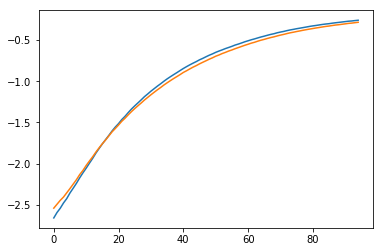

In [55]:
plt.plot(rmean_theo[5:])
plt.plot(measured.mean.r[5:])

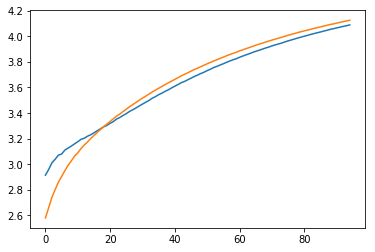

In [56]:
plt.plot(tstd_theo[5:])
plt.plot(measured.std.t[5:])

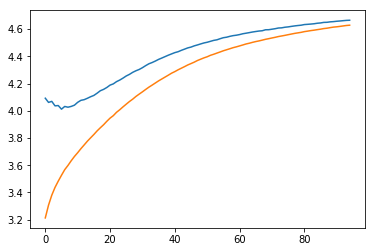

In [57]:
plt.plot(rstd_theo[5:])
plt.plot(measured.std.r[5:])

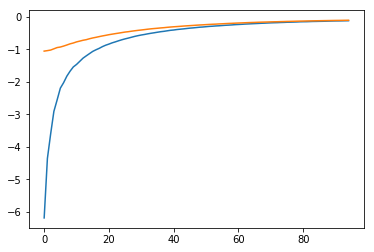

In [59]:
plt.plot(rgamma1_theo[5:])
plt.plot(measured.skewness.r[5:])

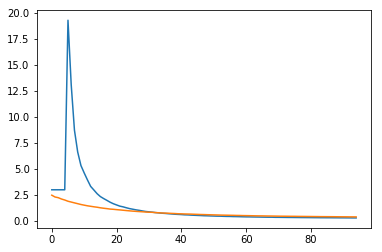

In [10]:
plt.plot(tgamma2_theo[5:])
plt.plot(measured.kurtosis.t[5:]-3)

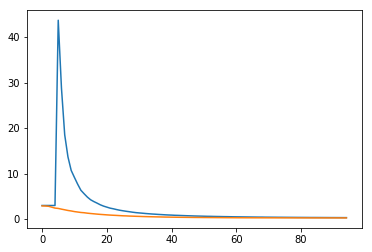

In [11]:
plt.plot(rgamma2_theo[5:])
plt.plot(measured.kurtosis.r[5:]-3)

# Sanity check

In [12]:
v_r = measured.v.r
v_t = measured.v.t



In [13]:
example = popt[99,:]
example = np.expand_dims(example, axis =0 )
print(example)

[[24.58857066 15.31133132  1.99137001 -0.6609313  23.89510221]]


In [32]:
#vr = np.linspace(np.min(v_r), np.max(v_r), 100)
value = 30
vr = np.linspace(-value, value, 60)
#vt = np.linspace(np.min(v_t), np.max(v_t), 100)
vt = np.linspace(-value,value, 60)

v = np.array(np.meshgrid(vr, vt)).T.reshape(-1,2)

sk = st.skewt(v, *example[0]).reshape(vr.shape[0], vt.shape[0])

In [33]:
sk.shape

(60, 60)

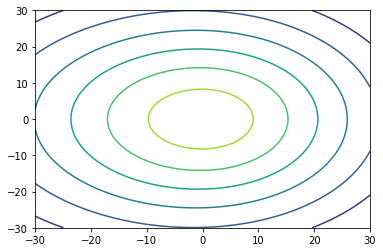

In [34]:
plt.contour(vr, vt, np.log10(sk))

In [35]:
tmean_theo, rmean_theo, tstd_theo, rstd_theo, rgamma1_theo, tgamma2_theo, rgamma2_theo = params2moments(example)

In [36]:
w_vt = np.abs(vt[1] - vt[0])
marginal_r = w_vt * np.sum(sk, axis = 0)
w_vr = np.abs(vr[1] - vr[0])

marginal_t = w_vr * np.sum(sk, axis = -1)

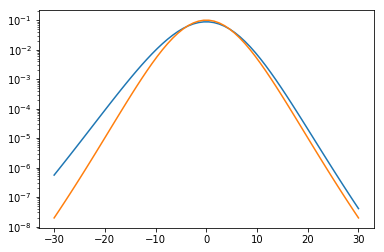

In [37]:
plt.semilogy(vr, marginal_r)
plt.semilogy(vt, marginal_t)

In [38]:
measured_mean = np.sum(marginal_r * vr)

In [39]:
print(measured_mean)
print(rmean_theo)

-0.25735961009423236
[-0.26174921]


In [40]:
measured_std_r = np.sqrt(np.sum(marginal_r * (vr - measured_mean )**2))

In [41]:
print(measured_std_r)
print(rstd_theo)

4.625414543428363
[4.66455339]


In [42]:
measured_std_t = np.sqrt(np.sum(marginal_t * (vt)**2))

In [43]:
print(measured_std_t)
print(tstd_theo)

4.053559284749693
[4.08777925]


In [44]:
measured_skewness = (np.sum(marginal_r * (vr - measured_mean )**3))/measured_std_r**3

In [45]:
print(measured_skewness)
print(rgamma1_theo)

-0.12473646675146371
[-0.12114696]


In [46]:
measured_k_r = (np.sum(marginal_r * (vr )**4))/measured_std_r**4 - 3

In [47]:
print(measured_k_r)
print(rgamma2_theo)

0.434847192256818
[0.33353204]


In [48]:
measured_k_t = (np.sum(marginal_t * (vt)**4))/measured_std_t**4 - 3

In [49]:
print(measured_k_t)
print(tgamma2_theo)

0.3573482335397582
[0.30158176]
